In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load delay.py

In [ ]:
flights=pd.read_csv('flights.csv')
flights=flights.sample(n=100000)
flights.head()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3569349,2015,8,10,1,DL,354,N317NB,SNA,SLC,1337,...,1621.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3262077,2015,7,23,4,DL,1165,N339NB,DTW,LGA,1002,...,1131.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1716167,2015,4,20,1,US,1728,N580UW,MCO,PHL,1200,...,1423.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4192298,2015,9,18,5,DL,2195,N805DN,ATL,MCI,1449,...,1543.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
896178,2015,2,28,6,OO,5193,N776SK,LAX,DFW,1700,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.shape

(100000, 31)

In [ ]:
flights.isnull().values.any()

True

In [ ]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              245
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1424
DEPARTURE_DELAY         1424
TAXI_OUT                1470
WHEELS_OFF              1470
SCHEDULED_TIME             0
ELAPSED_TIME            1764
AIR_TIME                1764
DISTANCE                   0
WHEELS_ON               1526
TAXI_IN                 1526
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1526
ARRIVAL_DELAY           1764
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98508
AIR_SYSTEM_DELAY       81661
SECURITY_DELAY         81661
AIRLINE_DELAY          81661
LATE_AIRCRAFT_DELAY    81661
WEATHER_DELAY          81661
dtype: int64

<AxesSubplot: xlabel='CANCELLATION_REASON', ylabel='count'>

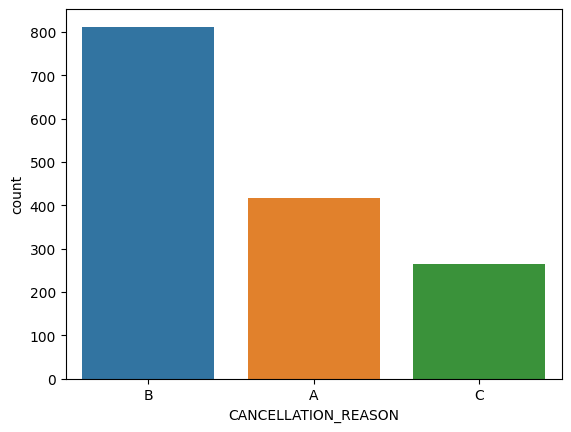

In [ ]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

We can observe from graph easily that mostly weather is responsible for delays of flight.

<AxesSubplot: xlabel='MONTH', ylabel='count'>

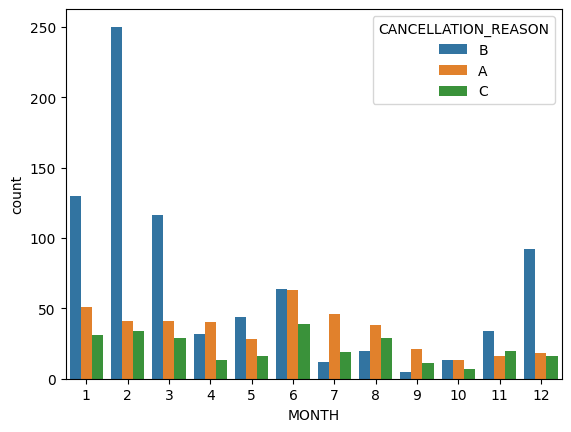

In [ ]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

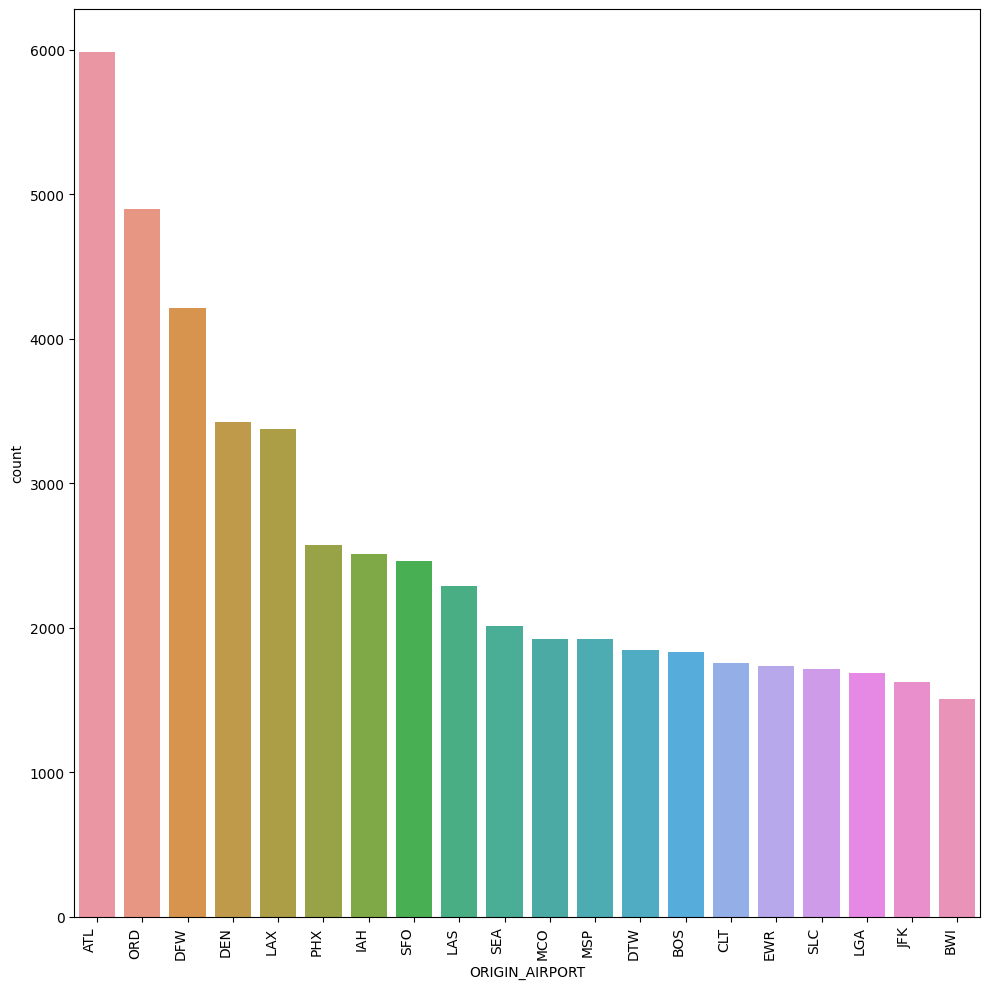

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

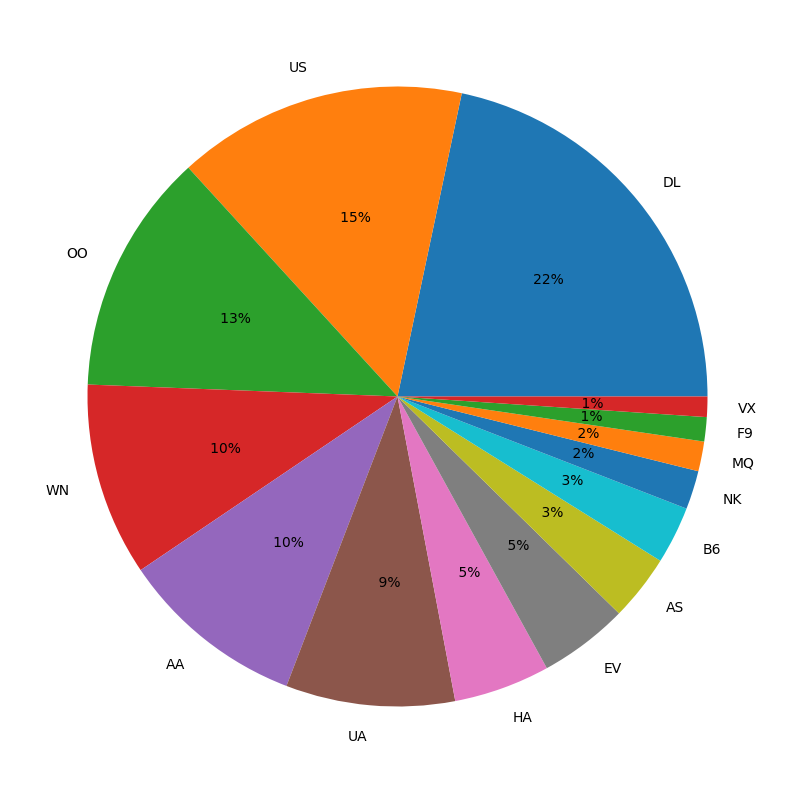

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

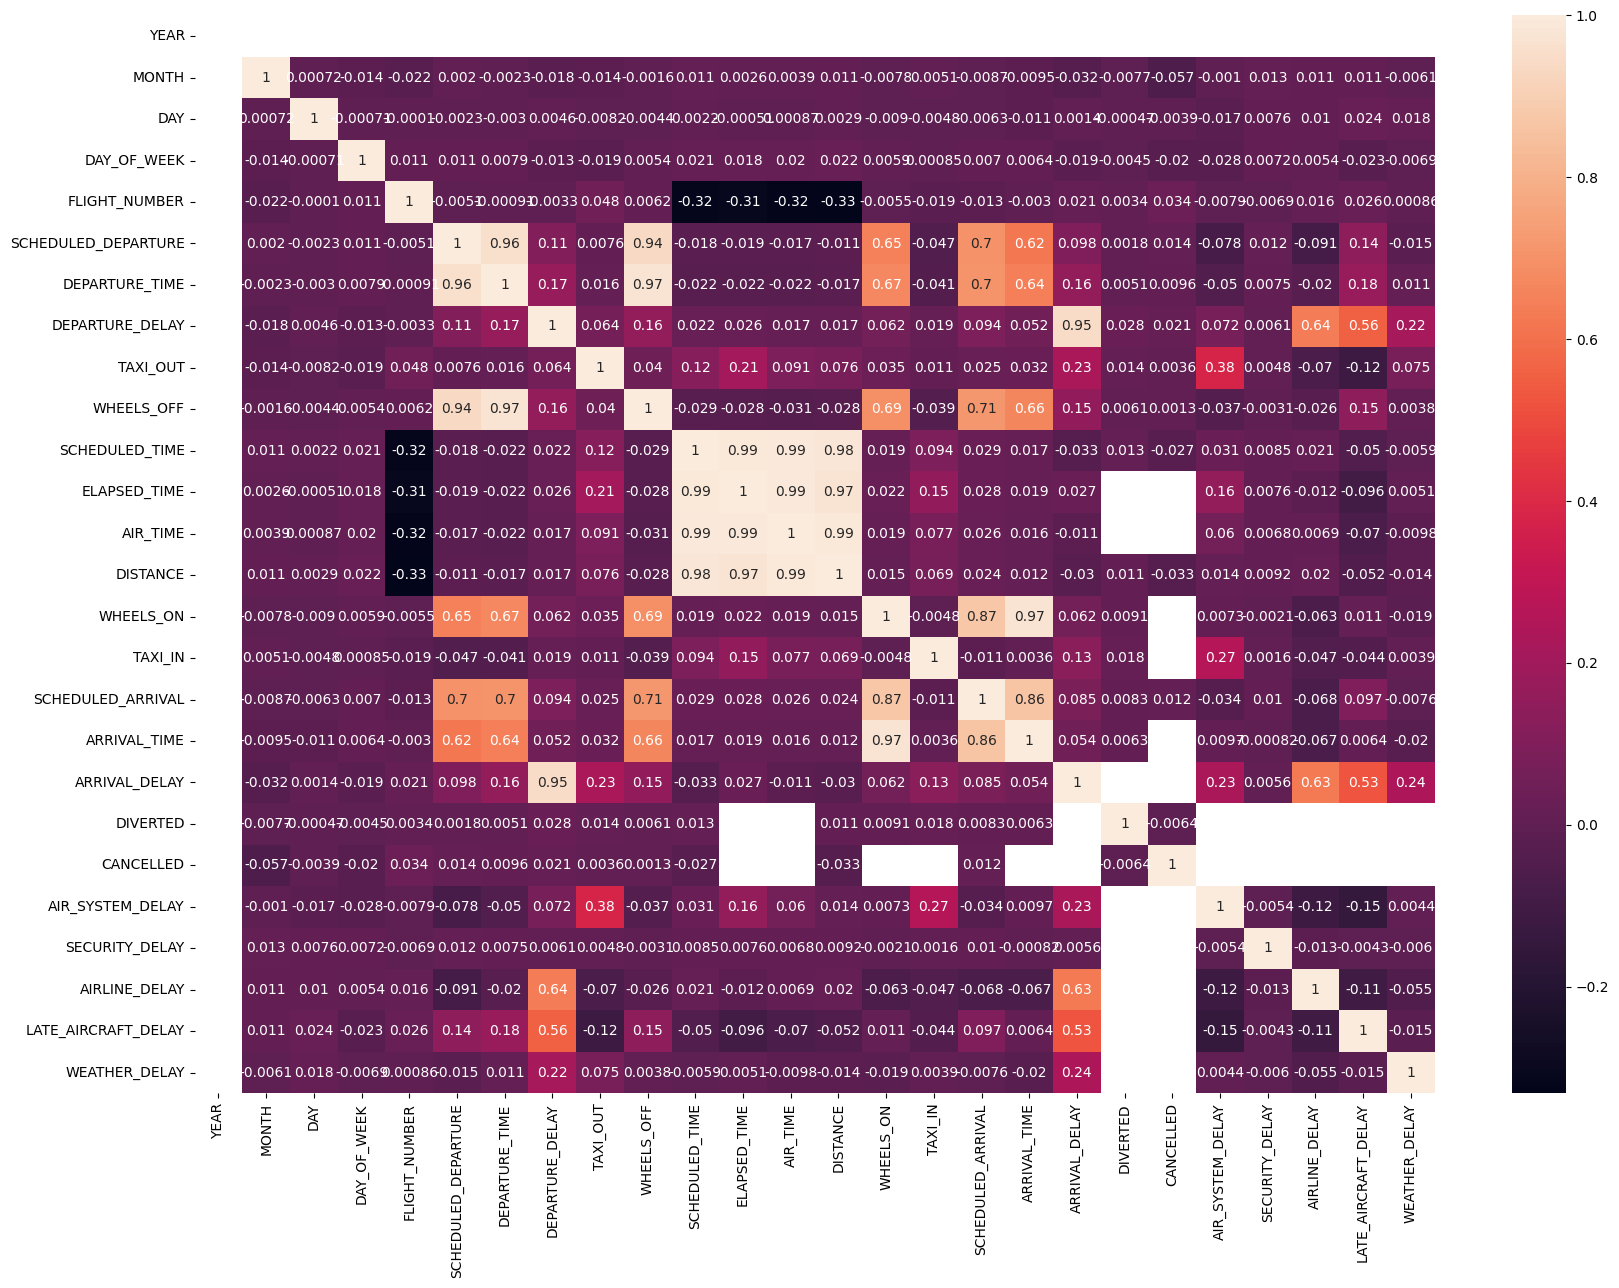

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.

In [ ]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.000719,-0.013809,-0.021837,0.001985,-0.002278,-0.017666,-0.013802,-0.001643,...,-0.008697,-0.009482,-0.031871,-0.007665,-0.057165,-0.001009,0.012951,0.011011,0.011063,-0.006095
DAY,NaN,0.000719,1.000000,-0.000713,-0.000102,-0.002259,-0.002969,0.004564,-0.008243,-0.004377,...,-0.006324,-0.010964,0.001365,-0.000472,-0.003912,-0.017476,0.007584,0.010465,0.023669,0.018170
DAY_OF_WEEK,NaN,-0.013809,-0.000713,1.000000,0.011049,0.011287,0.007878,-0.012920,-0.018587,0.005420,...,0.007013,0.006449,-0.018970,-0.004495,-0.020464,-0.028271,0.007208,0.005410,-0.023188,-0.006945
FLIGHT_NUMBER,NaN,-0.021837,-0.000102,0.011049,1.000000,-0.005127,-0.000910,-0.003277,0.048255,0.006202,...,-0.013097,-0.003037,0.021309,0.003393,0.033796,-0.007891,-0.006935,0.015629,0.026026,0.000861
SCHEDULED_DEPARTURE,NaN,0.001985,-0.002259,0.011287,-0.005127,1.000000,0.963288,0.108036,0.007586,0.935230,...,0.698292,0.622680,0.097646,0.001800,0.013671,-0.077914,0.012255,-0.090904,0.143792,-0.015024
DEPARTURE_TIME,NaN,-0.002278,-0.002969,0.007878,-0.000910,0.963288,1.000000,0.171585,0.016197,0.969516,...,0.703446,0.642634,0.159517,0.005132,0.009600,-0.049588,0.007483,-0.020305,0.177485,0.011498
DEPARTURE_DELAY,NaN,-0.017666,0.004564,-0.012920,-0.003277,0.108036,0.171585,1.000000,0.063725,0.160525,...,0.093556,0.052469,0.945705,0.027523,0.020805,0.071906,0.006065,0.640600,0.557594,0.217177
TAXI_OUT,NaN,-0.013802,-0.008243,-0.018587,0.048255,0.007586,0.016197,0.063725,1.000000,0.039880,...,0.025064,0.031720,0.231055,0.013627,0.003615,0.380395,0.004783,-0.070379,-0.122808,0.074584
WHEELS_OFF,NaN,-0.001643,-0.004377,0.005420,0.006202,0.935230,0.969516,0.160525,0.039880,1.000000,...,0.714820,0.663874,0.153304,0.006114,0.001348,-0.037223,-0.003070,-0.026477,0.146405,0.003764


In [ ]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
airport = pd.read_csv('airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3569349,8,10,1,DL,SNA,SLC,1337,-5.0,588,-3.0
3262077,7,23,4,DL,DTW,LGA,1002,-7.0,502,-19.0
1716167,4,20,1,US,MCO,PHL,1200,12.0,861,-5.0
4192298,9,18,5,DL,ATL,MCI,1449,-2.0,692,-17.0
896178,2,28,6,OO,LAX,DFW,1700,NaN,1235,NaN
...,...,...,...,...,...,...,...,...,...,...
2478952,6,6,6,B6,SFO,FLL,1425,-5.0,2584,-25.0
2158515,5,17,7,DL,BWI,ATL,1900,10.0,577,2.0
891799,2,28,6,EV,BTR,IAH,1146,-5.0,253,-3.0
3942684,9,2,3,EV,MAF,IAH,1047,-7.0,429,-11.0


In [ ]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

318
320
14


In [ ]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3569349,8,10,1,DL,SNA,SLC,1337,-5.0,588,-3.0
3262077,7,23,4,DL,DTW,LGA,1002,-7.0,502,-19.0
1716167,4,20,1,US,MCO,PHL,1200,12.0,861,-5.0
4192298,9,18,5,DL,ATL,MCI,1449,-2.0,692,-17.0
837706,2,25,3,WN,PHL,MDW,600,-4.0,668,-24.0
...,...,...,...,...,...,...,...,...,...,...
2478952,6,6,6,B6,SFO,FLL,1425,-5.0,2584,-25.0
2158515,5,17,7,DL,BWI,ATL,1900,10.0,577,2.0
891799,2,28,6,EV,BTR,IAH,1146,-5.0,253,-3.0
3942684,9,2,3,EV,MAF,IAH,1047,-7.0,429,-11.0


In [ ]:
flights.shape

(98236, 10)

In [ ]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3569349,8,10,SUNDAY,DL,SNA,SLC,1337,-5.0,588,-3.0
3262077,7,23,WEDNESDAY,DL,DTW,LGA,1002,-7.0,502,-19.0
1716167,4,20,SUNDAY,US,MCO,PHL,1200,12.0,861,-5.0
4192298,9,18,THURSDAY,DL,ATL,MCI,1449,-2.0,692,-17.0
837706,2,25,TUESDAY,WN,PHL,MDW,600,-4.0,668,-24.0
...,...,...,...,...,...,...,...,...,...,...
2478952,6,6,FRIDAY,B6,SFO,FLL,1425,-5.0,2584,-25.0
2158515,5,17,SATURDAY,DL,BWI,ATL,1900,10.0,577,2.0
891799,2,28,FRIDAY,EV,BTR,IAH,1146,-5.0,253,-3.0
3942684,9,2,TUESDAY,EV,MAF,IAH,1047,-7.0,429,-11.0


In [ ]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3569349,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3262077,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1716167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4192298,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
837706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478952,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158515,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
891799,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3942684,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=655)

In [ ]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
3569349,8,10,1337,-5.0,588,-3.0
3262077,7,23,1002,-7.0,502,-19.0
1716167,4,20,1200,12.0,861,-5.0
4192298,9,18,1449,-2.0,692,-17.0
837706,2,25,600,-4.0,668,-24.0
...,...,...,...,...,...,...
2478952,6,6,1425,-5.0,2584,-25.0
2158515,5,17,1900,10.0,577,2.0
891799,2,28,1146,-5.0,253,-3.0
3942684,9,2,1047,-7.0,429,-11.0


In [ ]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3569349,8,10,1337,-5.0,588,-3.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3262077,7,23,1002,-7.0,502,-19.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1716167,4,20,1200,12.0,861,-5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4192298,9,18,1449,-2.0,692,-17.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
837706,2,25,600,-4.0,668,-24.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478952,6,6,1425,-5.0,2584,-25.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2158515,5,17,1900,10.0,577,2.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
891799,2,28,1146,-5.0,253,-3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3942684,9,2,1047,-7.0,429,-11.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.shape

(98236, 661)

In [ ]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2493651,6,7,1412,-4.0,223,-4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2168086,5,18,1135,-2.0,226,-13.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4854764,10,30,1600,-1.0,853,-26.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5025613,11,10,1633,-5.0,237,-17.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1569758,4,11,830,-1.0,697,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836356,4,27,1915,-2.0,1781,-27.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2180742,5,19,726,1.0,534,-7.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
949172,3,4,748,-5.0,2342,-15.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
521953,2,4,1300,3.0,239,-8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
final_data.shape

(60000, 661)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [ ]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2493651,6,7,1412,223,-4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2168086,5,18,1135,226,-13.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4854764,10,30,1600,853,-26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5025613,11,10,1633,237,-17.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1569758,4,11,830,697,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836356,4,27,1915,1781,-27.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2180742,5,19,726,534,-7.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
949172,3,4,748,2342,-15.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
521953,2,4,1300,239,-8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y

2493651   -4.0
2168086   -2.0
4854764   -1.0
5025613   -5.0
1569758   -1.0
          ... 
1836356   -2.0
2180742    1.0
949172    -5.0
521953     3.0
3268636   -7.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train,y_train)

0.9897885401858574

In [ ]:
reg_rf.score(X_test,y_test)

0.9186380974976678

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9186380974976678

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 5.959947499999999
MSE: 98.50110814166666
RMSE: 9.924772447853233


In [ ]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
2247314,-4.0,-4.37
1194106,-3.0,-1.91
1465813,-6.0,-7.72
4294950,395.0,406.25
1353886,-4.0,2.37
...,...,...
1512950,-3.0,-5.97
1940757,26.0,21.77
2997360,-5.0,-2.05
5450303,-4.0,-4.26


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  14.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
p=rf_random.predict(X_test)

In [ ]:
metrics.r2_score(y_test,p)

0.9203303244083274

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 5.905133393904828
MSE: 96.45240695842747
RMSE: 9.821018631406188


In [ ]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
2247314,-4.0,-3.830731
1194106,-3.0,-2.378399
1465813,-6.0,-7.803971
4294950,395.0,414.636793
1353886,-4.0,1.393793
...,...,...
1512950,-3.0,-5.123236
1940757,26.0,21.863732
2997360,-5.0,-2.191515
5450303,-4.0,-3.413747


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [ ]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.9373355316475624
MSE: 95.49782972179975
RMSE: 9.772299101122506


In [ ]:
metrics.r2_score(y_test,pre)

0.9211188050815169

In [ ]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
2247314,-4.0,-3.972637
1194106,-3.0,-2.287778
1465813,-6.0,-6.047075
4294950,395.0,414.504620
1353886,-4.0,1.336713
...,...,...
1512950,-3.0,-3.147002
1940757,26.0,21.652905
2997360,-5.0,-2.091006
5450303,-4.0,-3.882907


In [ ]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [ ]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.5734211180281314

In [ ]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53b41ee3-08a2-4935-8c6a-d8eb230a4d35' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>